# Surprise Housing Data Regression Assignment

Building a regression model using regularisation to predict the actual value of the properties and decide wether to buy or not.

Steps we will follow in this exercise

    1. Data Understanding and Data Cleaning
    2. Visualize the data
    3. Preparing the data for modelling (train-test split, rescaling etc.,)
    4. Training the model
    5. Predictions And Residual Analysis
    6. Model Evaluation

## Step 1 - Data Understanding and Data Cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data from file
housing = pd.read_csv('train.csv')
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# checking the statistics of numerical columns
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### - Observations:

- Most <B>categorical variables</B> are categorized using numerical values. List of identified categorical variables are
        - MSSubClass 
        - OverallQual
        - OverallCond
        - Fireplaces
        - BsmtFullBath
        - BsmtHalfBath
        - FullBath
        - HalfBath 
        - BedroomAbvGr
        - KitchenAbvGr
        - TotRmsAbvGrd
        - GarageCars
     
     - All these feature values are replaced with proper category
     
    - Most of categorical variables have same type of categories, which will create duplicates
     
     
     
- <B>'Id' column</B> is the serial number of the data
    - <i>This needs to be removed</i>
    

In [4]:
# replace numeric values of categorical vars with categories
# define category lists

subClass_map = { 20:'1-STORY 1946 & NEWER ALL STYLES' , 
            30:'1-STORY 1945 & OLDER', 
            40:'1-STORY W/FINISHED ATTIC ALL AGES', 
            45:'1-1/2 STORY - UNFINISHED ALL AGES' , 
            50:'1-1/2 STORY FINISHED ALL AGES' , 
            60:'2-STORY 1946 & NEWER' , 
            70:'2-STORY 1945 & OLDER' ,
            75:'2-1/2 STORY ALL AGES',
            80:'SPLIT OR MULTI-LEVEL', 
            85:'SPLIT FOYER', 
            90:'DUPLEX - ALL STYLES AND AGES', 
            120:'1-STORY PUD - 1946 & NEWER',
            150:'1-1/2 STORY PUD - ALL AGES', 
            160:'2-STORY PUD - 1946 & NEWER', 
            180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 
            190:'2 FAMILY CONVERSION - ALL STYLES AND AGES' }

rating_map = { 1:'Very Poor', 
               2:'Poor', 
               3:'Fair', 
               4:'Below Average', 
               5:'Average', 
               6:'Above Average', 
               7:'Good', 
               8:'Very Good', 
               9:'Excellent', 
               10:'Very Excellent' }

value_map = { 0:'No', 
               1:'One',
               2:'Two',
               3:'Three',
               4:'Four', 
               5:'Five', 
               6:'Six', 
               7:'Seven', 
               8:'Eight',
               9:'Nine',
               10:'Ten', 
               11:'Eleven', 
               12:'Twelve', 
               13:'Thirteen', 
               14:'Fourteen' }

In [5]:
# Apply category definitions on dataset to replace number scale with proper meaningful category

housing['OverallQual'] = housing['OverallQual'].map(rating_map)
housing['OverallCond'] = housing['OverallCond'].map(rating_map)
housing['MSSubClass'] = housing['MSSubClass'].map(subClass_map)
housing['Fireplaces'] = housing['Fireplaces'].map(value_map)
housing['BsmtFullBath'] = housing['BsmtFullBath'].map(value_map)
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].map(value_map)
housing['FullBath'] = housing['FullBath'].map(value_map)
housing['HalfBath'] = housing['HalfBath'].map(value_map)
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].map(value_map)
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].map(value_map)
housing['TotRmsAbvGrd'] = housing['TotRmsAbvGrd'].map(value_map)
housing['GarageCars'] = housing['GarageCars'].map(value_map)

# Drop Id column as it is just a serial number

housing = housing.drop(['Id'], axis=1)

housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  Alley LotShape LandContour Utilities LotConfig  ... PoolArea PoolQC Fence  \
0   NaN      Reg         Lvl    AllPub    Inside  ...        0    NaN   NaN   
1   NaN      Reg         Lvl    AllPub       FR2  ...        0    NaN   NaN   
2   NaN      IR1         Lvl    AllPub    Inside  ...        0    NaN   NaN   
3   NaN      IR1         Lvl    AllPub    Corner  ...        0    NaN   NaN   
4   NaN      IR1         Lvl    AllPub       FR2  ...        0    NaN   NaN   

  MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  
0         NaN       0      2   2008       WD         Normal     208500  
1         NaN       0      5   2007       WD         Normal     181500  
2         NaN       0      9   2008       WD         Normal     223500  
3         NaN       0      2   2006       WD        Abnorml     140000  
4         NaN       0     12   2008       WD         Normal     250000  

[5 rows x 80 columns]

### Analyzing the null/missing data

In [6]:
# checking dataset for any null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [7]:
NA = housing.isna().sum()
NA[NA>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### - Observations:

- Most <B>null values</B> are categorical variables with null/None type of category.
    - For ex, Alley NaN values represent No alley access
    - Such values should be replaced with proper category identifier.
    
- <B>'Id' column</B> is the serial number of the data
    - <i>This needs to be removed</i>
    

In [8]:
housing["Alley"].fillna("No Alley", inplace = True)
housing["MasVnrType"].fillna("None", inplace = True)
housing["BsmtQual"].fillna("No Basement", inplace = True)
housing["BsmtCond"].fillna("No Basement", inplace = True)
housing["BsmtExposure"].fillna("No Basement", inplace = True)
housing["BsmtFinType1"].fillna("No Basement", inplace = True)
housing["BsmtFinType2"].fillna("No Basement", inplace = True)
housing["FireplaceQu"].fillna("No Fireplace", inplace = True)
housing["GarageType"].fillna("No Garage", inplace = True)
housing["GarageFinish"].fillna("No Garage", inplace = True)
housing["GarageQual"].fillna("No Garage", inplace = True)
housing["GarageCond"].fillna("No Garage", inplace = True)
housing["PoolQC"].fillna("No Pool", inplace = True)
housing["Fence"].fillna("No Fence", inplace = True)
housing["MiscFeature"].fillna("None", inplace = True)

In [9]:
# Rechecking for null/missing data after features are filled
NA = housing.isna().sum()
NA[NA>0]

LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [10]:
# Electrical has a single null value 
print(housing["Electrical"].value_counts())

# Based on value_counts(), most common category of Electrical is filled for null value.
housing["Electrical"].fillna("SBrkr", inplace = True)

# 'MasVnrType' empty attribute is considered None, hence the 'MasVnrArea' empty values have no area which is 0.0 sqft
housing["MasVnrArea"].fillna("0.0", inplace = True)
housing["MasVnrArea"] = housing["MasVnrArea"].astype(float)

# Empty values of attribute 'LotFrontage' is considered as no front area, hence null value is replaced as 0.0 ft
housing["LotFrontage"].fillna("0.0", inplace = True)
housing["LotFrontage"] = housing["LotFrontage"].astype(float)

# 'GarageYrBlt' has 'GarageType' as No Garage.
# This is considered as Garage was never built so I am using min year found for NaN year
housing["GarageYrBlt"].fillna("1900", inplace = True)
housing["GarageYrBlt"] = housing["GarageYrBlt"].astype(int)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [11]:
# dataset after handling all categorical and null values
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

      Alley LotShape LandContour Utilities LotConfig  ... PoolArea   PoolQC  \
0  No Alley      Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1  No Alley      Reg         Lvl    AllPub       FR2  ...        0  No Pool   
2  No Alley      IR1         Lvl    AllPub    Inside  ...        0  No Pool   
3  No Alley      IR1         Lvl    AllPub    Corner  ...        0  No Pool   
4  No Alley      IR1         Lvl    AllPub       FR2  ...        0  No Pool   

      Fence MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  \
0  No Fence        None       0      2   2008       WD         Normal   
1  No Fence        None       0      5   2007       WD         Normal   
2  No Fence        None       0      9   2008       WD         Normal   
3  No Fence        None       0      2   2006       WD        Abnorml   
4  No Fence        None       0     12   2008       WD         Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 80 columns]

In [12]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Step 2 - Data Visualization

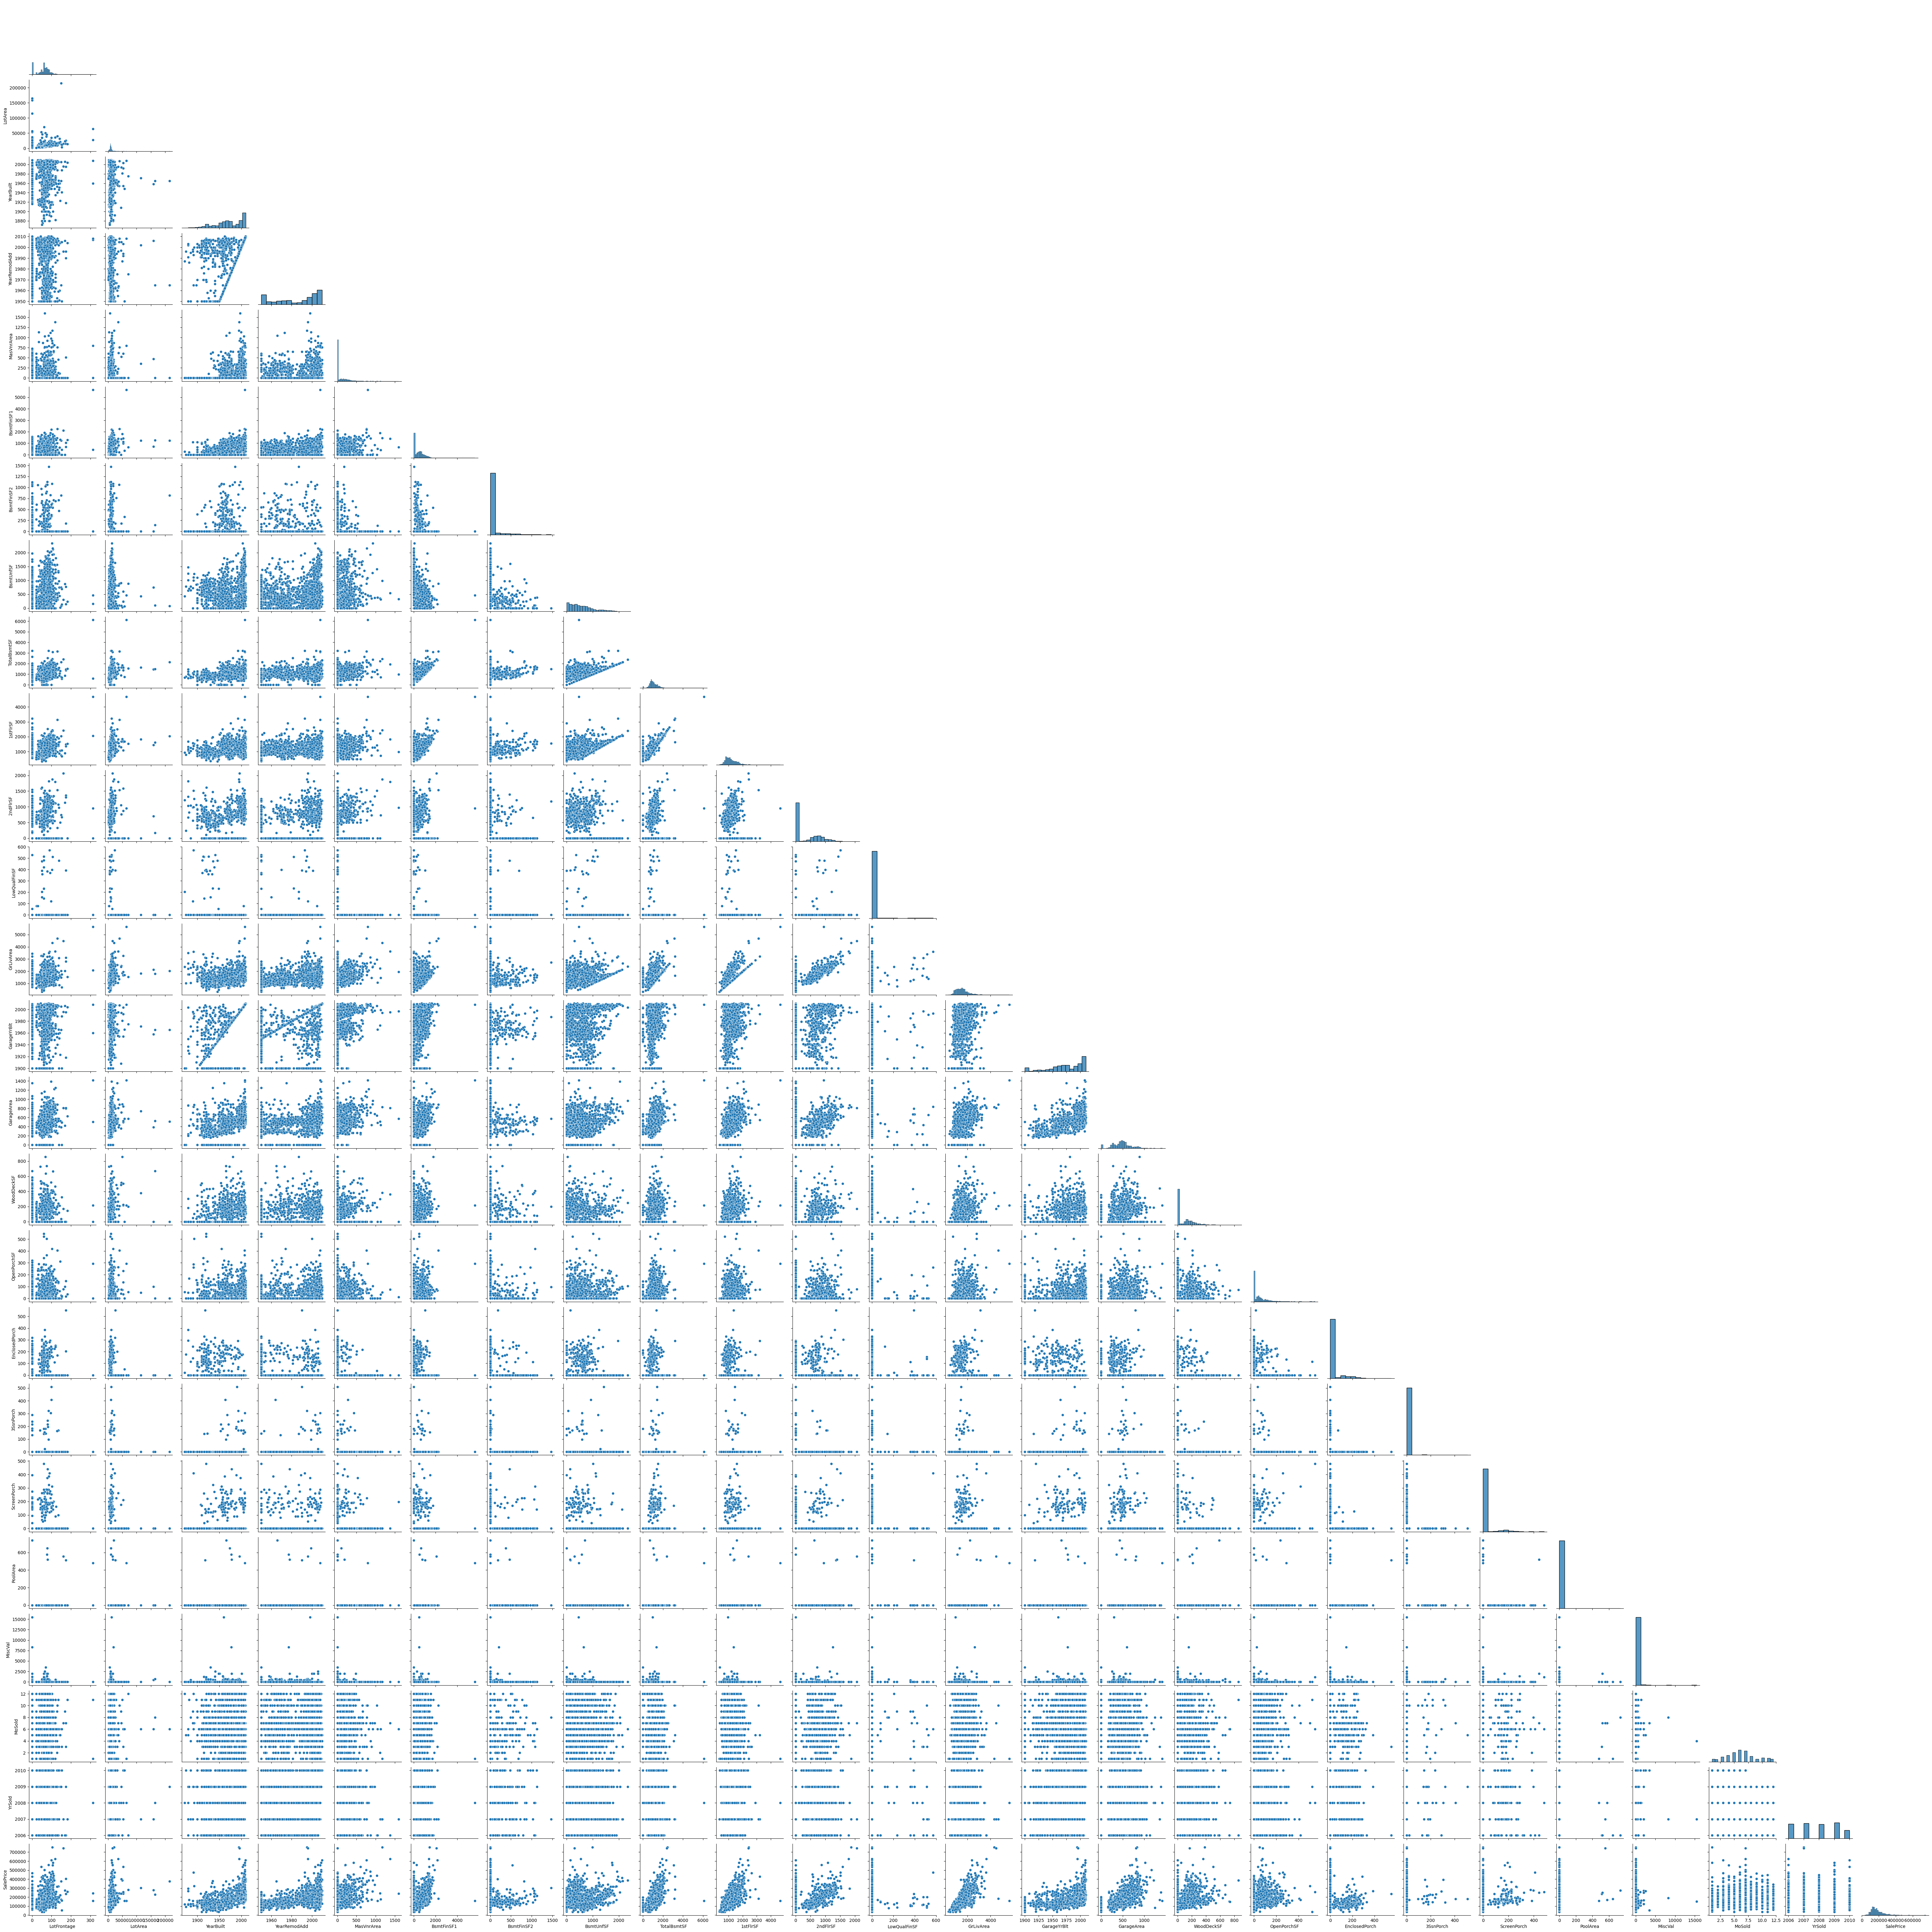

In [13]:
# Plotting the pairplot to check relationship b/w vars
sns.pairplot(housing, corner=True)
plt.show()

#### Visulaize Numeric variables

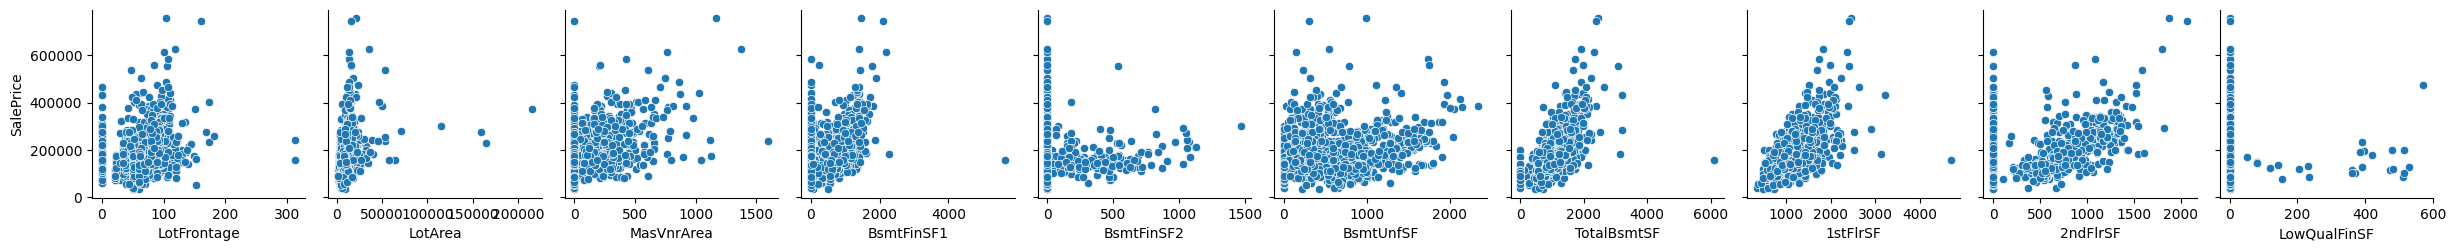

In [14]:
# Plotting the numerical variables separately
sns.pairplot(x_vars=['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                    '2ndFlrSF','LowQualFinSF'], 
             y_vars='SalePrice',
             data=housing)
plt.show()

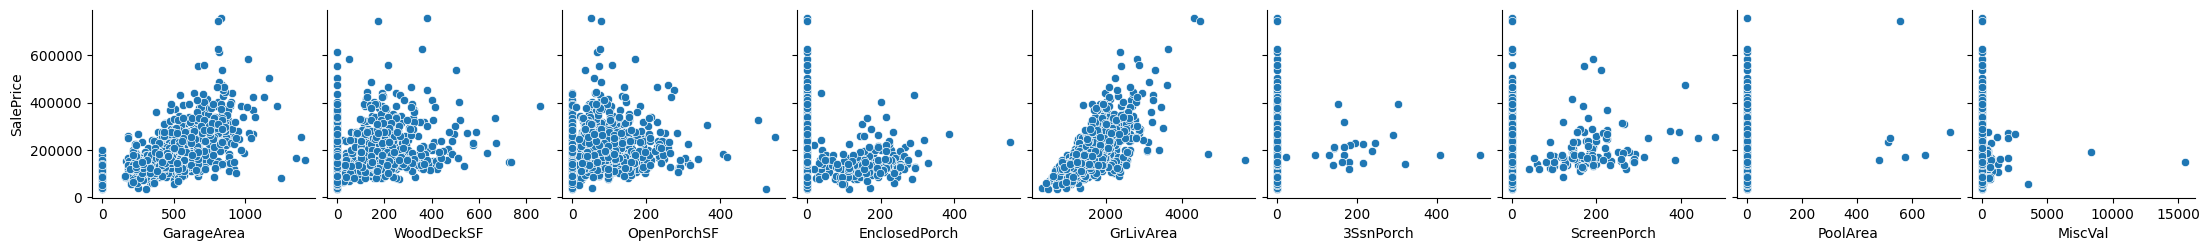

In [15]:
sns.pairplot(x_vars=['GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','GrLivArea',
                     '3SsnPorch','ScreenPorch','PoolArea','MiscVal'], 
             y_vars='SalePrice',
             data=housing)
plt.show()

In [16]:
sns.pairplot(x_vars=['YearBuilt', 'YearRemodAdd','GarageYrBlt', 'MoSold', 'YrSold'], 
             y_vars='SalePrice',
             data=housing)
plt.show()

#### Visualize categorical variables

In [17]:
# Visualize all the categorical data
plt.figure(figsize=(20, 80))
plt.subplot(18, 3, 1)
sns.boxplot(x='MSSubClass', y='SalePrice', data=housing)
plt.subplot(18, 3, 2)
sns.boxplot(x='MSZoning', y='SalePrice', data=housing)
plt.subplot(18, 3, 3)
sns.boxplot(x='Street', y='SalePrice', data=housing)
plt.subplot(18, 3, 4)
sns.boxplot(x='Alley', y='SalePrice', data=housing)
plt.subplot(18, 3, 5)
sns.boxplot(x='LotShape', y='SalePrice', data=housing)
plt.subplot(18, 3, 6)
sns.boxplot(x='LandContour', y='SalePrice', data=housing)
plt.subplot(18, 3, 7)
sns.boxplot(x='Utilities', y='SalePrice', data=housing)
plt.subplot(18, 3, 8)
sns.boxplot(x='LotConfig', y='SalePrice', data=housing)
plt.subplot(18, 3, 9)
sns.boxplot(x='LandSlope', y='SalePrice', data=housing)
plt.subplot(18, 3, 10)
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing)
plt.subplot(18, 3, 11)
sns.boxplot(x='Condition1', y='SalePrice', data=housing)
plt.subplot(18, 3, 12)
sns.boxplot(x='Condition2', y='SalePrice', data=housing)
plt.subplot(18, 3, 13)
sns.boxplot(x='BldgType', y='SalePrice', data=housing)
plt.subplot(18, 3, 14)
sns.boxplot(x='HouseStyle', y='SalePrice', data=housing)
plt.subplot(18, 3, 15)
sns.boxplot(x='OverallQual', y='SalePrice', data=housing)
plt.subplot(18, 3, 16)
sns.boxplot(x='OverallCond', y='SalePrice', data=housing)
plt.subplot(18, 3, 17)
sns.boxplot(x='RoofStyle', y='SalePrice', data=housing)
plt.subplot(18, 3, 18)
sns.boxplot(x='RoofMatl', y='SalePrice', data=housing)
plt.subplot(18, 3, 19)
sns.boxplot(x='Exterior1st', y='SalePrice', data=housing)
plt.subplot(18, 3, 20)
sns.boxplot(x='Exterior2nd', y='SalePrice', data=housing)
plt.subplot(18, 3, 21)
sns.boxplot(x='MasVnrType', y='SalePrice', data=housing)
plt.subplot(18, 3, 22)
sns.boxplot(x='ExterQual', y='SalePrice', data=housing)
plt.subplot(18, 3, 23)
sns.boxplot(x='ExterCond', y='SalePrice', data=housing)
plt.subplot(18, 3, 24)
sns.boxplot(x='Foundation', y='SalePrice', data=housing)
plt.subplot(18, 3, 25)
sns.boxplot(x='BsmtQual', y='SalePrice', data=housing)
plt.subplot(18, 3, 26)
sns.boxplot(x='BsmtCond', y='SalePrice', data=housing)
plt.subplot(18, 3, 27)
sns.boxplot(x='BsmtExposure', y='SalePrice', data=housing)
plt.subplot(18, 3, 28)
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=housing)
plt.subplot(18, 3, 29)
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=housing)
plt.subplot(18, 3, 30)
sns.boxplot(x='Heating', y='SalePrice', data=housing)
plt.subplot(18, 3, 31)
sns.boxplot(x='HeatingQC', y='SalePrice', data=housing)
plt.subplot(18, 3, 32)
sns.boxplot(x='CentralAir', y='SalePrice', data=housing)
plt.subplot(18, 3, 33)
sns.boxplot(x='Electrical', y='SalePrice', data=housing)
plt.subplot(18, 3, 34)
sns.boxplot(x='BsmtFullBath', y='SalePrice', data=housing)
plt.subplot(18, 3, 35)
sns.boxplot(x='BsmtHalfBath', y='SalePrice', data=housing)
plt.subplot(18, 3, 36)
sns.boxplot(x='FullBath', y='SalePrice', data=housing)
plt.subplot(18, 3, 37)
sns.boxplot(x='HalfBath', y='SalePrice', data=housing)
plt.subplot(18, 3, 38)
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=housing)
plt.subplot(18, 3, 39)
sns.boxplot(x='KitchenAbvGr', y='SalePrice', data=housing)
plt.subplot(18, 3, 40)
sns.boxplot(x='KitchenQual', y='SalePrice', data=housing)
plt.subplot(18, 3, 41)
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=housing)
plt.subplot(18, 3, 42)
sns.boxplot(x='Functional', y='SalePrice', data=housing)
plt.subplot(18, 3, 43)
sns.boxplot(x='Fireplaces', y='SalePrice', data=housing)
plt.subplot(18, 3, 44)
sns.boxplot(x='FireplaceQu', y='SalePrice', data=housing)
plt.subplot(18, 3, 45)
sns.boxplot(x='GarageType', y='SalePrice', data=housing)
plt.subplot(18, 3, 46)
sns.boxplot(x='GarageQual', y='SalePrice', data=housing)
plt.subplot(18, 3, 47)
sns.boxplot(x='GarageCond', y='SalePrice', data=housing)
plt.subplot(18, 3, 48)
sns.boxplot(x='PavedDrive', y='SalePrice', data=housing)
plt.subplot(18, 3, 49)
sns.boxplot(x='PoolQC', y='SalePrice', data=housing)
plt.subplot(18, 3, 50)
sns.boxplot(x='Fence', y='SalePrice', data=housing)
plt.subplot(18, 3, 51)
sns.boxplot(x='MiscFeature', y='SalePrice', data=housing)
plt.subplot(18, 3, 52)
sns.boxplot(x='SaleType', y='SalePrice', data=housing)
plt.subplot(18, 3, 53)
sns.boxplot(x='SaleCondition', y='SalePrice', data=housing)

<AxesSubplot: xlabel='SaleCondition', ylabel='SalePrice'>

## Step 3 - Prepare the data for Modelling

#### 1. Apply Dummy variables for all categorical variables of train dataset

In [18]:
df = pd.get_dummies(housing)
df.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLw  \
0           0        150          856       856  ...               0   
1           0        284         1262      1262  ...               0   
2           0        434          920       920  ...               0   
3           0        540          756       961  ...               0   
4           0        490         1145      1145  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 372 columns]

#### Splitting the Dataset into train and test sets

In [19]:
# splitting teh data to train and test dataset
df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)

### Data Sclaing

- All the categorical variables are with in the scale of '0' and '1'
- Scaling Numerical data as well using MinMaxScaler method

In [20]:
# Data scaling using MinMaxScale

scaler = MinMaxScaler()
num_vars = ['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                    '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                    '3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearBuilt', 'YearRemodAdd','GarageYrBlt',
                    'MoSold', 'YrSold', 'SalePrice']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### - Dividing Train, Test Sets into X and Y sets for the model building

In [21]:
# x_train, y_train

y_train = df_train.pop('SalePrice')  # will remove SalePrice from train and store in y_train
X_train = df_train  # remaing of df train is x_train

# x_test, y_test

y_test = df_test.pop('SalePrice')
X_test = df_test  

## Step 4 - Model Building

### Linear Regression

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
def get_error_stats(y,y_pred,DoPrint=True):
    R2 = r2_score(y, y_pred)
    RSS = np.sum(np.square(y, y_pred))
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    if DoPrint:
        print(F"R2  Score  {R2}")
        print(F"RSS Score  {RSS}")
        print(F"MSE score  {MSE}")
        print(F"MAE Score  {MAE} \n")
    return R2,RSS,MSE,MAE

In [24]:
print(" Linear Regression results: ")
print(" Train set ")
y_train_pred = lm.predict(X_train)
get_error_stats(y_train,y_train_pred)
print(" Test set ")
y_test_pred = lm.predict(X_test)
get_error_stats(y_test,y_test_pred)

 Linear Regression results: 
 Train set 
R2  Score  0.9527494999398073
RSS Score  61.96684114291476
MSE score  0.024844106820263653
MAE Score  0.14931006263992433 

 Test set 
R2  Score  -1.1711693606942192e+20
RSS Score  15.82464317591481
MSE score  0.025156060314693942
MAE Score  0.15024582035326023 



(-1.1711693606942192e+20,
 15.82464317591481,
 0.025156060314693942,
 0.15024582035326023)

### Linear Regression using RFE feature selection

In [25]:
# Recursive Feature Elimination execution
rfelm = RFE(lm, n_features_to_select=150)
rfelm = rfelm.fit(X_train, y_train)

In [26]:
print(" Linear Regression with RFE results: ")
print(" Train set ")
y_rfe_train_pred = rfelm.predict(X_train)
get_error_stats(y_train,y_rfe_train_pred)
print(" Test set ")
y_rfe_test_pred = lm.predict(X_test)
get_error_stats(y_test,y_rfe_test_pred)

 Linear Regression with RFE results: 
 Train set 
R2  Score  0.8516253845948577
RSS Score  61.96684114291476
MSE score  0.024844106820263653
MAE Score  0.14931006263992433 

 Test set 
R2  Score  -1.1711693606942192e+20
RSS Score  15.82464317591481
MSE score  0.025156060314693942
MAE Score  0.15024582035326023 



(-1.1711693606942192e+20,
 15.82464317591481,
 0.025156060314693942,
 0.15024582035326023)

#### Parameters list considered for Ridge and Lasso Regression
- higher parameters are selected to avoid overfitting

In [27]:
params = {'alpha':[0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 
                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]}

### Ridge Regression

In [28]:

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [29]:
# printing the best parameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [30]:
alpha = 1.0
ridgereg = Ridge(alpha=alpha)

ridgereg.fit(X_train, y_train)
print(ridgereg.coef_)

[-6.88456925e-03  5.60692647e-02  3.93035784e-02  9.42114581e-03
  3.77411386e-02  6.12251885e-02  2.66768001e-02  1.51055105e-03
  6.35687749e-02  1.14650501e-01  8.39174671e-02 -1.64852179e-02
  1.26842783e-01 -2.78830808e-03  1.53072997e-02  9.56843722e-03
  1.33882919e-02  2.44109310e-03  4.05326516e-02  1.24197705e-02
  5.19259208e-03  3.75614116e-03 -3.01520020e-03 -8.95580219e-04
  3.27890183e-03  6.08964721e-04  5.26377277e-03  1.15654788e-02
 -6.97824250e-03  1.65956786e-03 -7.57096277e-03 -1.02515480e-02
  7.76065153e-03  4.67940930e-03 -1.18306636e-02  1.14628660e-04
 -5.84137460e-03 -1.53770988e-03  9.07912580e-03 -3.32168821e-02
  1.79946489e-02  6.26807612e-03  5.50705746e-03  3.44709962e-03
 -6.21547644e-03  6.21547644e-03  5.89984603e-04 -1.81912480e-04
 -4.08072123e-04 -2.83459357e-03  7.88957285e-04  4.60367007e-03
 -2.55803379e-03 -9.09982878e-03  2.11479410e-04  1.41348428e-03
  7.47486509e-03  1.68057358e-02 -1.68057358e-02  5.62753054e-03
  1.63946263e-02 -9.76830

### Lasso Regression

In [31]:
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [32]:
# printing the best parameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [33]:
alpha = 0.0001
lassoreg = Lasso(alpha=alpha)

lassoreg.fit(X_train, y_train)
lassoreg.coef_

array([ 0.00000000e+00,  4.62407236e-02,  4.13944504e-02,  1.08732986e-02,
        3.00080878e-02,  6.95977832e-02,  6.72972440e-03, -0.00000000e+00,
        6.79173432e-02,  0.00000000e+00,  0.00000000e+00, -2.37032742e-02,
        3.83161049e-01,  0.00000000e+00,  1.85638249e-02,  2.96331554e-03,
        6.37705621e-03, -0.00000000e+00,  8.16593481e-03,  4.44793967e-03,
        0.00000000e+00,  0.00000000e+00, -1.56288064e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  5.79091306e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -9.55324337e-03,
       -0.00000000e+00,  0.00000000e+00, -5.79227441e-03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -2.87282941e-02,
        6.30675963e-03,  0.00000000e+00,  0.00000000e+00, -6.38405221e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.13781324e-04, -

## Step 5 - Model Predictions And Error Analysis

### Ridge Regression Predictions

In [34]:
print(" Train set ")
y_train_pred_ridgereg = ridgereg.predict(X_train)
get_error_stats(y_train, y_train_pred_ridgereg)
print(" Test set ")
y_test_pred_ridgereg = ridgereg.predict(X_test)
get_error_stats(y_test, y_test_pred_ridgereg)

 Train set 
R2  Score  0.9342532077006559
RSS Score  61.96684114291476
MSE score  0.024844106820263653
MAE Score  0.14931006263992433 

 Test set 
R2  Score  0.8553907032604651
RSS Score  15.82464317591481
MSE score  0.025156060314693942
MAE Score  0.15024582035326023 



(0.8553907032604651,
 15.82464317591481,
 0.025156060314693942,
 0.15024582035326023)

### Lasso Regression Predictions

In [35]:
print(" Train set ")
y_train_pred_lassoreg = lassoreg.predict(X_train)
get_error_stats(y_train, y_train_pred_lassoreg)
print(" Test set ")
y_test_pred_lassoreg = lassoreg.predict(X_test)
get_error_stats(y_test, y_test_pred_lassoreg)

 Train set 
R2  Score  0.9356243100900897
RSS Score  61.96684114291476
MSE score  0.024844106820263653
MAE Score  0.14931006263992433 

 Test set 
R2  Score  0.8534038002335702
RSS Score  15.82464317591481
MSE score  0.025156060314693942
MAE Score  0.15024582035326023 



(0.8534038002335702,
 15.82464317591481,
 0.025156060314693942,
 0.15024582035326023)

## Step 6 - Model Evaluation

### Compare coefficients

In [36]:
betas = pd.DataFrame(index=X_train.columns)

In [37]:
betas.rows = X_train.columns

In [38]:
betas['linear'] = lm.coef_
betas['ridge'] = ridgereg.coef_
betas['lasso'] = lassoreg.coef_

In [39]:
pd.set_option('display.max_rows', None)
betas.head(50)

linear     ridge  \
LotFrontage                                         6.015361e-03 -0.006885   
LotArea                                             1.908464e-01  0.056069   
YearBuilt                                           8.474910e-02  0.039304   
YearRemodAdd                                        8.426210e-03  0.009421   
MasVnrArea                                          4.606704e-02  0.037741   
BsmtFinSF1                                          2.610832e+10  0.061225   
BsmtFinSF2                                          6.818509e+09  0.026677   
BsmtUnfSF                                           1.080599e+10  0.001511   
TotalBsmtSF                                        -2.826397e+10  0.063569   
1stFlrSF                                           -2.537238e+10  0.114651   
2ndFlrSF                                           -1.212823e+10  0.083917   
LowQualFinSF                                       -3.024716e+09 -0.016485   
GrLivArea                                           3.056432e+10  0.126843   
GarageYrBlt                                        -1.932981e-03 -0.002788   
GarageArea                                          2.223442e-02  0.015307   
WoodDeckSF                                          5.653409e-03  0.009568   
OpenPorchSF                                         2.063996e-02  0.013388   
EnclosedPorch                                       1.522921e-02  0.002441   
3SsnPorch                                           4.285208e-02  0.040533   
ScreenPorch                                         1.290288e-02  0.012420   
PoolArea                                            3.982470e+00  0.005193   
MiscVal                                             1.348247e-01  0.003756   
MoSold                                             -3.584480e-03 -0.003015   
YrSold                                             -1.844646e-03 -0.000896   
MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES        3.963664e+09  0.003279   
MSSubClass_1-1/2 STORY FINISHED ALL AGES            3.963664e+09  0.000609   
MSSubClass_1-STORY 1945 & OLDER                     3.963664e+09  0.005264   
MSSubClass_1-STORY 1946 & NEWER ALL STYLES          3.963664e+09  0.011565   
MSSubClass_1-STORY PUD - 1946 & NEWER               3.963664e+09 -0.006978   
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES        3.963664e+09  0.001660   
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND...  3.963664e+09 -0.007571   
MSSubClass_2-1/2 STORY ALL AGES                     3.963664e+09 -0.010252   
MSSubClass_2-STORY 1945 & OLDER                     3.963664e+09  0.007761   
MSSubClass_2-STORY 1946 & NEWER                     3.963664e+09  0.004679   
MSSubClass_2-STORY PUD - 1946 & NEWER               3.963664e+09 -0.011831   
MSSubClass_DUPLEX - ALL STYLES AND AGES             1.006818e+10  0.000115   
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  3.963664e+09 -0.005841   
MSSubClass_SPLIT FOYER                              3.963664e+09 -0.001538   
MSSubClass_SPLIT OR MULTI-LEVEL                     3.963664e+09  0.009079   
MSZoning_C (all)                                   -1.184205e+10 -0.033217   
MSZoning_FV                                        -1.184205e+10  0.017995   
MSZoning_RH                                        -1.184205e+10  0.006268   
MSZoning_RL                                        -1.184205e+10  0.005507   
MSZoning_RM                                        -1.184205e+10  0.003447   
Street_Grvl                                        -4.112937e+09 -0.006215   
Street_Pave                                        -4.112937e+09  0.006215   
Alley_Grvl                                          7.123538e+09  0.000590   
Alley_No Alley                                      7.123538e+09 -0.000182   
Alley_Pave                                          7.123538e+09 -0.000408   
LotShape_IR1                                        9.780913e+09 -0.002835   

                                                       lasso  
LotFrontage     

In [40]:
lassoCoefs = betas[betas['lasso'] !=0]
lassoCoefs['lasso'].sort_values()

RoofMatl_ClyTile                             -0.463702
Condition2_PosN                              -0.427298
PoolQC_Gd                                    -0.115256
MSZoning_C (all)                             -0.028728
OverallCond_Fair                             -0.023965
LowQualFinSF                                 -0.023703
BedroomAbvGr_Five                            -0.019760
Functional_Maj1                              -0.015389
Neighborhood_Edwards                         -0.012916
Neighborhood_MeadowV                         -0.011675
OverallCond_Below Average                    -0.009989
MSSubClass_2-1/2 STORY ALL AGES              -0.009553
SaleCondition_Abnorml                        -0.008650
LandContour_Bnk                              -0.007934
Neighborhood_Mitchel                         -0.007664
SaleCondition_Family                         -0.007308
GarageQual_Fa                                -0.007294
OverallCond_Average                          -0.006786
ExterQual_

In [41]:
betas['ridge'].sort_values()

Condition2_PosN                                        -0.199541
RoofMatl_ClyTile                                       -0.163446
PoolQC_Gd                                              -0.163446
MSZoning_C (all)                                       -0.033217
Fireplaces_Three                                       -0.028586
OverallCond_Fair                                       -0.027242
BedroomAbvGr_Five                                      -0.025585
OverallQual_Average                                    -0.024976
Neighborhood_Edwards                                   -0.024172
OverallQual_Below Average                              -0.023948
Neighborhood_MeadowV                                   -0.022825
OverallQual_Above Average                              -0.021602
TotRmsAbvGrd_Three                                     -0.020984
Foundation_Wood                                        -0.020552
OverallQual_Fair                                       -0.019182
Condition1_RRAe          

#### Most Important Parameters for Ridge and lasso

#### Ridge - Five most predictors of Ridge

    Condition2_PosN                                        -0.199541
    RoofMatl_ClyTile                                       -0.163446
    PoolQC_Gd                                              -0.163446
    PoolQC_Ex                                               0.114495
    1stFlrSF                                                0.114651
    GrLivArea                                               0.126843

#### Lasso - Top most predictors of Lasso

    RoofMatl_ClyTile                             -0.463702
    Condition2_PosN                              -0.427298
    PoolQC_Gd                                    -0.115256
    OverallQual_Excellent                         0.071347
    OverallQual_Very Excellent                    0.100486
    GrLivArea                                     0.383161

### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso ?

In [42]:
# Optimal Alpha was 1.0 and it was doubled for ridge test
alpha = 2.0
ridgereg2 = Ridge(alpha=alpha)

ridgereg2.fit(X_train, y_train)

print(" Train set ")
y_train_pred_ridgereg2 = ridgereg2.predict(X_train)
get_error_stats(y_train, y_train_pred_ridgereg2)
print(" Test set ")
y_test_pred_ridgereg2 = ridgereg2.predict(X_test)
get_error_stats(y_test, y_test_pred_ridgereg2)

 Train set 
R2  Score  0.9246485617838043
RSS Score  61.96684114291476
MSE score  0.024844106820263653
MAE Score  0.14931006263992433 

 Test set 
R2  Score  0.8787638863517455
RSS Score  15.82464317591481
MSE score  0.025156060314693942
MAE Score  0.15024582035326023 



(0.8787638863517455,
 15.82464317591481,
 0.025156060314693942,
 0.15024582035326023)

In [43]:
# Optimal Alpha for lasso was 0.0001 and it was doubled for test

alpha = 0.0002
lassoreg2 = Lasso(alpha=alpha)

lassoreg2.fit(X_train, y_train)

print(" Train set ")
y_train_pred_lassoreg2 = lassoreg2.predict(X_train)
get_error_stats(y_train, y_train_pred_lassoreg2)
print(" Test set ")
y_test_pred_lassoreg2 = lassoreg2.predict(X_test)
get_error_stats(y_test, y_test_pred_lassoreg2)

 Train set 
R2  Score  0.9121545066281357
RSS Score  61.96684114291476
MSE score  0.024844106820263653
MAE Score  0.14931006263992433 

 Test set 
R2  Score  0.8711952113254925
RSS Score  15.82464317591481
MSE score  0.025156060314693942
MAE Score  0.15024582035326023 



(0.8711952113254925,
 15.82464317591481,
 0.025156060314693942,
 0.15024582035326023)

In [44]:
betas_with_doubleparam = pd.DataFrame(index=X_train.columns)
betas_with_doubleparam.rows = X_train.columns
betas_with_doubleparam['ridge 2.0'] = ridgereg2.coef_
betas_with_doubleparam['lasso 0.0002'] = lassoreg2.coef_
betas_with_doubleparam

ridge 2.0  lasso 0.0002
LotFrontage                                         -0.007382  0.000000e+00
LotArea                                              0.038867  0.000000e+00
YearBuilt                                            0.026719  1.621978e-02
YearRemodAdd                                         0.010596  1.343292e-02
MasVnrArea                                           0.034668  1.485289e-02
BsmtFinSF1                                           0.042472  0.000000e+00
BsmtFinSF2                                           0.022523  0.000000e+00
BsmtUnfSF                                            0.004181 -0.000000e+00
TotalBsmtSF                                          0.046264  2.741420e-02
1stFlrSF                                             0.087018  7.992261e-03
2ndFlrSF                                             0.071831  0.000000e+00
LowQualFinSF                                        -0.011132 -4.178238e-03
GrLivArea                                            0.099638  3.189741e-01
GarageYrBlt                                         -0.003400  0.000000e+00
GarageArea                                           0.016633  2.174340e-02
WoodDeckSF                                           0.010799  2.200532e-03
OpenPorchSF                                          0.010760  0.000000e+00
EnclosedPorch                                        0.001540 -0.000000e+00
3SsnPorch                                            0.033107  0.000000e+00
ScreenPorch                                          0.011379  0.000000e+00
PoolArea                                             0.006305  0.000000e+00
MiscVal                                              0.003050  0.000000e+00
MoSold                                              -0.002596 -0.000000e+00
YrSold                                              -0.000866 -0.000000e+00
MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES         0.004279  0.000000e+00
MSSubClass_1-1/2 STORY FINISHED ALL AGES             0.000079  0.000000e+00
MSSubClass_1-STORY 1945 & OLDER                      0.002446 -0.000000e+00
MSSubClass_1-STORY 1946 & NEWER ALL STYLES           0.011242  1.046992e-02
MSSubClass_1-STORY PUD - 1946 & NEWER               -0.005058  0.000000e+00
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES         0.001049  0.000000e+00
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND...  -0.005340  0.000000e+00
MSSubClass_2-1/2 STORY ALL AGES                     -0.007133 -0.000000e+00
MSSubClass_2-STORY 1945 & OLDER                      0.005921  0.000000e+00
MSSubClass_2-STORY 1946 & NEWER                      0.001472  0.000000e+00
MSSubClass_2-STORY PUD - 1946 & NEWER               -0.011688 -4.751147e-03
MSSubClass_DUPLEX - ALL STYLES AND AGES              0.001595 -0.000000e+00
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  -0.004956 -0.000000e+00
MSSubClass_SPLIT FOYER                              -0.000793 -0.000000e+00
MSSubClass_SPLIT OR MULTI-LEVEL                      0.006886 -0.000000e+00
MSZoning_C (all)                                    -0.030612 -1.858921e-02
MSZoning_FV                                          0.016407  1.750228e-03
MSZoning_RH                                          0.006416  0.000000e+00
MSZoning_RL                                          0.005125  0.000000e+00
MSZoning_RM                                          0.002664 -7.618638e-03
Street_Grvl                                         -0.003847 -0.000000e+00
Street_Pave                                          0.003847  0.000000e+00
Alley_Grvl                                          -0.000552 -0.000000e+00
Alley_No Alley                                      -0.000794  0.000000e+00
Alley_Pave                                           0.001346  0.000000e+00
LotShape_IR1                                        -0.001989  0.000000e+00
LotShape_IR2                                         0.001874  0.000000e+00
LotShape_IR3                                         0.001974  0.000000e+00
LotShape_Reg            

##### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### the top predictors from Lasso are 

    RoofMatl_ClyTile                             -0.463702
    Condition2_PosN                              -0.427298
    PoolQC_Gd                                    -0.115256
    OverallQual_Excellent                         0.071347
    OverallQual_Very Excellent                    0.100486
    GrLivArea                                     0.383161

In [45]:
# Dropping five predictors from Input dataset to build a new model based on remaining available predictors.

housing_new = housing.drop(['GrLivArea', 'RoofMatl', 'Condition2', 'PoolQC', 'OverallQual'], axis=1)

df_new = pd.get_dummies(housing_new)
df_new.head()


LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLw  \
0           0        150          856       856  ...               0   
1           0        284         1262      1262  ...               0   
2           0        434          920       920  ...               0   
3           0        540          756       961  ...               0   
4           0        490         1145      1145  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 341 columns]

In [46]:
# splitting teh data to train and test dataset
df_train_new, df_test_new = train_test_split(df_new, train_size=0.8, random_state=100)

# Data scaling using MinMaxScale

scaler = MinMaxScaler()
num_vars = ['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                    '2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                    '3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearBuilt', 'YearRemodAdd','GarageYrBlt',
                    'MoSold', 'YrSold', 'SalePrice']

df_train_new[num_vars] = scaler.fit_transform(df_train_new[num_vars])
df_test_new[num_vars] = scaler.transform(df_test_new[num_vars])

# x_train, y_train

y_train_new = df_train_new.pop('SalePrice')  # will remove SalePrice from train and store in y_train
X_train_new = df_train_new  # remaing of df train is x_train

# x_test, y_test

y_test_new = df_test_new.pop('SalePrice')
X_test_new = df_test_new 

In [47]:
# Lasso Regression Model Building with new input parameters

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train_new, y_train_new)

# printing the best parameter alpha
print(model_cv.best_params_)


Fitting 5 folds for each of 22 candidates, totalling 110 fits
{'alpha': 0.0001}


In [48]:
alpha = 0.0001
lassoreg_new = Lasso(alpha=alpha)

lassoreg_new.fit(X_train_new, y_train_new)
lassoreg_new.coef_

array([-0.00000000e+00,  1.43939035e-02,  1.60033377e-02,  1.17263223e-02,
        2.01085535e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.73038212e-01,  1.27960633e-01,  0.00000000e+00,
        0.00000000e+00,  2.39172301e-03,  1.23362379e-02,  0.00000000e+00,
       -0.00000000e+00,  1.21596810e-02,  8.13301512e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.29063632e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -3.10272607e-04, -8.80371002e-03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -3.53579884e-02,  5.54972371e-03,
        0.00000000e+00,  0.00000000e+00, -3.96701261e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.34418451e-02, -

In [50]:

print(" Train set ")
y_train_pred_lasso_new = lassoreg_new.predict(X_train_new)
get_error_stats(y_train_new, y_train_pred_lasso_new)
print(" Test set ")
y_test_pred_lasso_new = lassoreg_new.predict(X_test_new)
get_error_stats(y_test_new, y_test_pred_lasso_new)

 Train set 
R2  Score  0.8933702045669931
RSS Score  61.96684114291476
MSE score  0.024844106820263653
MAE Score  0.14931006263992433 

 Test set 
R2  Score  0.8864830580774737
RSS Score  15.82464317591481
MSE score  0.025156060314693942
MAE Score  0.15024582035326023 



(0.8864830580774737,
 15.82464317591481,
 0.025156060314693942,
 0.15024582035326023)

In [51]:
new_betas = pd.DataFrame(index = X_train_new.columns)
new_betas.rows = X_train_new.columns

new_betas['lasso_new_predictors'] = lassoreg_new.coef_
new_betas['lasso_new_predictors'].sort_values()

Fireplaces_Three                                       -0.055842
MSZoning_C (all)                                       -0.035358
BedroomAbvGr_Five                                      -0.028575
Neighborhood_Edwards                                   -0.025863
LandContour_Bnk                                        -0.023442
OverallCond_Fair                                       -0.021984
Neighborhood_MeadowV                                   -0.014379
Neighborhood_Mitchel                                   -0.013762
ExterQual_TA                                           -0.013002
TotRmsAbvGrd_Three                                     -0.011114
Neighborhood_NAmes                                     -0.010479
Neighborhood_OldTown                                   -0.010391
TotRmsAbvGrd_Four                                      -0.009974
GarageQual_Fa                                          -0.009798
LotConfig_FR2                                          -0.009391
LandSlope_Gtl            

####  With new predictor inputs, the most important predictors for lasso are 

    Fireplaces_Three                                       -0.055842
    MSZoning_C (all)                                       -0.035358
    BedroomAbvGr_Five                                      -0.028575
    Neighborhood_StoneBr                                    0.049978
    Neighborhood_NoRidge                                    0.059875
    2ndFlrSF                                                0.127961
    1stFlrSF                                                0.273038
